<a href="https://colab.research.google.com/github/shannu1584/OIBSIP/blob/main/TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Iris Flower Classification**

**Import Necessary Libraries**











In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

**Load the Data Set**

In [ ]:
import pandas as pd
df=pd.read_csv('/content/Iris.csv')
print(df)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

**Explore the Data Set**
* **To print first few Rows**



In [ ]:
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


* **To print Last few Rows**




In [ ]:
print(df.tail())

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  


*  **To get dataset Information**




In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


*   **To get Summary Statistics**




In [ ]:
print(df.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


**Data Preprocessing**

* **Checking for missing values**




In [ ]:
print(df.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


*   **Checking for any duplicate values**



In [ ]:
print(df.duplicated().sum())

0


*  **Encode categorical labels**




In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
encoded_data=encoder.fit_transform(df[['Species']])
print(encoded_data)

  (0, 0)	1.0
  (1, 0)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 0)	1.0
  (5, 0)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 0)	1.0
  (11, 0)	1.0
  (12, 0)	1.0
  (13, 0)	1.0
  (14, 0)	1.0
  (15, 0)	1.0
  (16, 0)	1.0
  (17, 0)	1.0
  (18, 0)	1.0
  (19, 0)	1.0
  (20, 0)	1.0
  (21, 0)	1.0
  (22, 0)	1.0
  (23, 0)	1.0
  (24, 0)	1.0
  :	:
  (125, 2)	1.0
  (126, 2)	1.0
  (127, 2)	1.0
  (128, 2)	1.0
  (129, 2)	1.0
  (130, 2)	1.0
  (131, 2)	1.0
  (132, 2)	1.0
  (133, 2)	1.0
  (134, 2)	1.0
  (135, 2)	1.0
  (136, 2)	1.0
  (137, 2)	1.0
  (138, 2)	1.0
  (139, 2)	1.0
  (140, 2)	1.0
  (141, 2)	1.0
  (142, 2)	1.0
  (143, 2)	1.0
  (144, 2)	1.0
  (145, 2)	1.0
  (146, 2)	1.0
  (147, 2)	1.0
  (148, 2)	1.0
  (149, 2)	1.0


**Split the Data**

In [ ]:
from sklearn.model_selection import train_test_split

x=df.drop(columns=['Species'])
y=df['Species']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print(x_train)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
22    23            4.6           3.6            1.0           0.2
15    16            5.7           4.4            1.5           0.4
65    66            6.7           3.1            4.4           1.4
11    12            4.8           3.4            1.6           0.2
42    43            4.4           3.2            1.3           0.2
..   ...            ...           ...            ...           ...
71    72            6.1           2.8            4.0           1.3
106  107            4.9           2.5            4.5           1.7
14    15            5.8           4.0            1.2           0.2
92    93            5.8           2.6            4.0           1.2
102  103            7.1           3.0            5.9           2.1

[120 rows x 5 columns]


In [ ]:
print(x_test)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
73    74            6.1           2.8            4.7           1.2
18    19            5.7           3.8            1.7           0.3
118  119            7.7           2.6            6.9           2.3
78    79            6.0           2.9            4.5           1.5
76    77            6.8           2.8            4.8           1.4
31    32            5.4           3.4            1.5           0.4
64    65            5.6           2.9            3.6           1.3
141  142            6.9           3.1            5.1           2.3
68    69            6.2           2.2            4.5           1.5
82    83            5.8           2.7            3.9           1.2
110  111            6.5           3.2            5.1           2.0
12    13            4.8           3.0            1.4           0.1
36    37            5.5           3.5            1.3           0.2
9     10            4.9           3.1            1.5          

In [ ]:
print(y_train)

22         Iris-setosa
15         Iris-setosa
65     Iris-versicolor
11         Iris-setosa
42         Iris-setosa
            ...       
71     Iris-versicolor
106     Iris-virginica
14         Iris-setosa
92     Iris-versicolor
102     Iris-virginica
Name: Species, Length: 120, dtype: object


In [ ]:
print(y_test)

73     Iris-versicolor
18         Iris-setosa
118     Iris-virginica
78     Iris-versicolor
76     Iris-versicolor
31         Iris-setosa
64     Iris-versicolor
141     Iris-virginica
68     Iris-versicolor
82     Iris-versicolor
110     Iris-virginica
12         Iris-setosa
36         Iris-setosa
9          Iris-setosa
19         Iris-setosa
56     Iris-versicolor
104     Iris-virginica
69     Iris-versicolor
55     Iris-versicolor
132     Iris-virginica
29         Iris-setosa
127     Iris-virginica
26         Iris-setosa
128     Iris-virginica
131     Iris-virginica
145     Iris-virginica
108     Iris-virginica
143     Iris-virginica
45         Iris-setosa
30         Iris-setosa
Name: Species, dtype: object


**Train a Machine Learning Model**
*   **Using K-Nearest Neighbors (KNN)**







In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)

KNeighborsClassifier()

**Evaluate the Model**


In [ ]:
y_pred = model.predict(x_test)
print(y_pred)


['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa']


*   **Accuracy**




In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


**Using Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

*   **Training Accuracy**




In [ ]:
print("Train Data Accuracy:",accuracy_score(y_train,model.predict(x_train)))

Train Data Accuracy: 1.0


*   **Testing Accuracy**

In [ ]:
print("Test Data Accuracy:",accuracy_score(y_true=y_test,y_pred=model.predict(x_test)))

Test Data Accuracy: 1.0


*   **Confusion matrix**

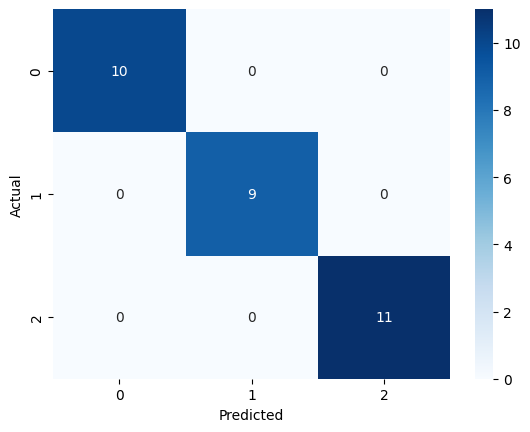

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()